# Projet 4 - Groupe 4 

In [1]:
import pandas as pd
dataset = pd.read_csv("dataset/train.csv")
dataset.head(5)

name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask

In [2]:
print(dataset["classname"].value_counts())

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64


In [3]:
dataset = dataset[dataset["classname"].isin(["face_with_mask",
                                    "face_no_mask"])]
dataset.head(5)

name   x1   x2   y1   y2       classname
0   2756.png   69  126  294  392  face_with_mask
1   2756.png  505   10  723  283  face_with_mask
4   6098.jpg  360   85  728  653    face_no_mask
7   4591.png  239    9  522  342  face_with_mask
11  5525.jpg  262   18  484  319    face_no_mask

### Répartition des classes Mask / No mask

In [4]:
dataset["classname"].value_counts()

face_with_mask    4180
face_no_mask      1569
Name: classname, dtype: int64

In [5]:
df_loc_im = dataset[dataset["name"]=="2756.png"]
print(df_loc_im)

       name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask


In [6]:
def crop_img(df_loc_im):        
    
    #df_loc_im = dataset[dataset["name"]==pic_ref]
    pic_name = df_loc_im["name"]
        
    print(df_loc_im)

    x1 = df_loc_im["x1"]
    x2 = df_loc_im["x2"]
    y1 = df_loc_im["y1"]
    y2 = df_loc_im["y2"]
    
    im = Image.open(f"dataset/Medical mask/images/{pic_name}")
    im_crop = im.crop((x1,x2,y1,y2))

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
    ax1.imshow(im)
    ax2.imshow(im_crop)
    print(f"Image size :{im_crop.size}")

    return im_crop

In [7]:
def resize_img(im):
    im_resized = im.resize((50,50))

    plt.imshow(im_resized)
    print(im_resized.size)
    
    return im_resized

In [8]:
def split_rgb(im_resized):

    im_r,im_g,im_b = im_resized.split()
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
    ax1.imshow(im_r,cmap="Reds")
    ax2.imshow(im_g,cmap="Greens")
    ax3.imshow(im_b,cmap="Blues")
    
    rgb_chan = [im_r,im_g,im_b]
    
    return rgb_chan

In [9]:
import numpy as np
import skimage.io
import skimage.color
import skimage.filters

def blurr_img(rgb_chan):

    im_r_arr, im_g_arr, im_b_arr = [np.asarray(rgb_chan[i]) for i in range(len(rgb_chan))]

    #im_r_arr = np.asarray(im_r)
    #im_g_arr = np.asarray(im_g)
    #im_b_arr = np.asarray(im_b)

    blurred_image_r = skimage.filters.gaussian(im_r_arr, sigma=1.0)
    blurred_image_g = skimage.filters.gaussian(im_g_arr, sigma=1.0)
    blurred_image_b = skimage.filters.gaussian(im_b_arr, sigma=1.0)

    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
    ax1.imshow(blurred_image_r,cmap="Reds")
    ax2.imshow(blurred_image_g,cmap="Greens")
    ax3.imshow(blurred_image_b,cmap="Blues")
    
    blurred_rgb_chan = (blurred_image_r, blurred_image_g, blurred_image_b)
    
    return blurred_rgb_chan

In [10]:
import skimage.io
import skimage.color
import skimage.filters

def rgb_hist(blurred_rgb_chan):


    histogram_r, bin_edges_r = np.histogram(blurred_rgb_chan[0], bins=256, range=(0,1))
    histogram_g, bin_edges_g = np.histogram(blurred_rgb_chan[1], bins=256, range=(0,1))
    histogram_b, bin_edges_b = np.histogram(blurred_rgb_chan[2], bins=256, range=(0,1))

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,sharex=False,figsize=(20,5))

    ax1.set_title("Red Histogram")
    ax1.set(xlabel='Red values', ylabel='pixel counts')
    ax1.plot(bin_edges_r[0:-1], histogram_r,'tab:red')

    ax2.set_title("Green Histogram")
    ax2.set(xlabel='Green values', ylabel='pixel counts')
    ax2.plot(bin_edges_g[0:-1], histogram_g,'tab:green')

    ax3.set_title("Blue Histogram")
    ax3.set(xlabel='Blue values', ylabel='pixel counts')
    ax3.plot(bin_edges_b[0:-1], histogram_b,'tab:blue')


    plt.xlim(0,1)

    plt.show()
    
    rgb_chan_hist = [(histogram_r, bin_edges_r),
                    (histogram_g, bin_edges_g),
                    (histogram_b, bin_edges_b)]
    
    
    return rgb_chan_hist

In [11]:
def search_tresh(rgb_chan_hist):

    red_tresh_offset = 8
    max_bin_index = np.argmax(rgb_chan_hist[0][0])
    max_red_pxcount = rgb_chan_hist[0][1][max_bin_index+red_tresh_offset]
    print(f'Max red_value: {max_red_pxcount}')

    green_tresh_offset = 9
    max_bin_index = np.argmax(rgb_chan_hist[1][0])
    max_green_pxcount = rgb_chan_hist[1][1][max_bin_index+green_tresh_offset]
    print(f'Max green_value: {max_green_pxcount}')

    blue_tresh_offset = 9
    max_bin_index = np.argmax(rgb_chan_hist[2][0])
    max_blue_pxcount = rgb_chan_hist[2][1][max_bin_index+blue_tresh_offset]
    print(f'Max blue_value: {max_blue_pxcount}')
    
    max_pxcount = (max_red_pxcount,max_green_pxcount,max_blue_pxcount)
    
    return max_pxcount

2756.png
       name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
name               2756.png
x1                       69
x2                      126
y1                      294
y2                      392
classname    face_with_mask
Name: 0, dtype: object
Image size :(225, 266)
(50, 50)


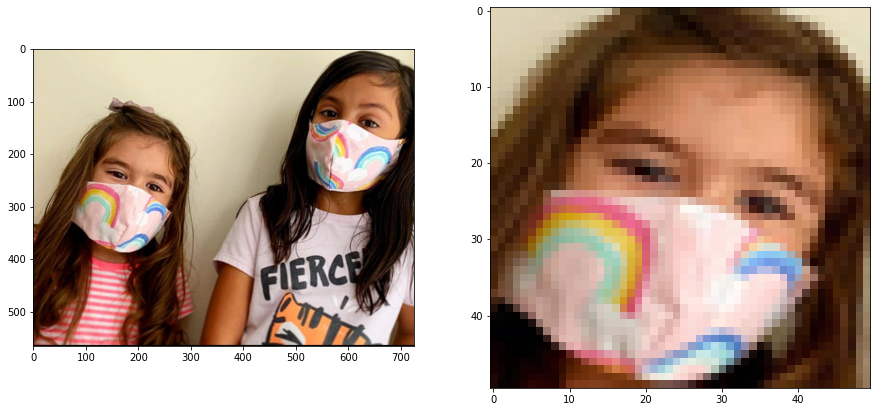

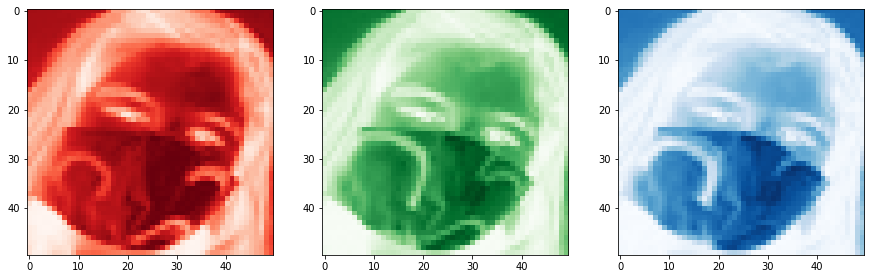

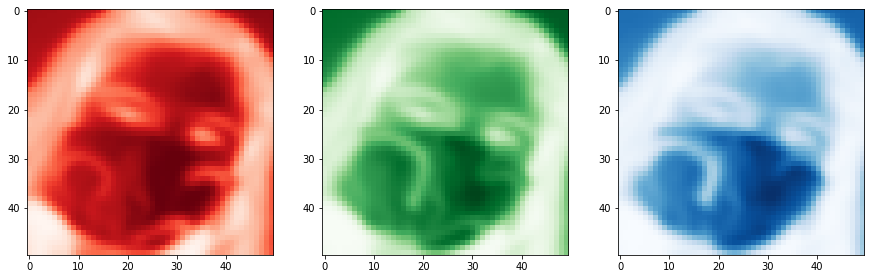

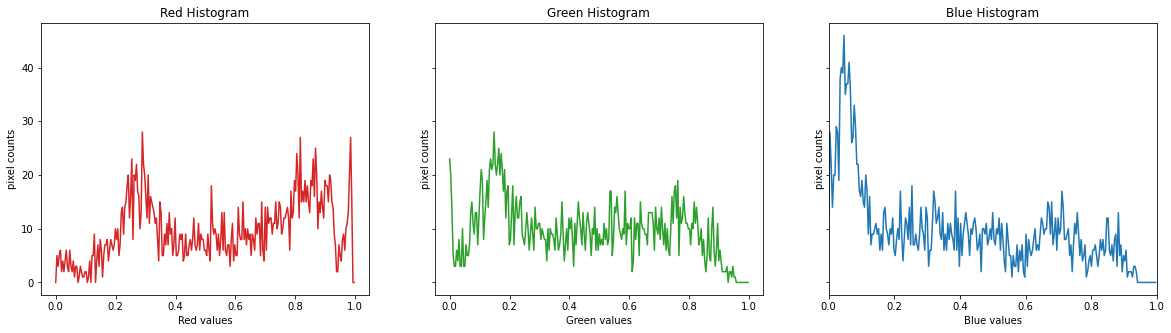

Max red_value: 0.3203125
Max green_value: 0.18359375
Max blue_value: 0.08203125
(INDEX : 0
name               2756.png
x1                      505
x2                       10
y1                      723
y2                      283
classname    face_with_mask
Name: 1, dtype: object
Image size :(218, 273)
(50, 50)


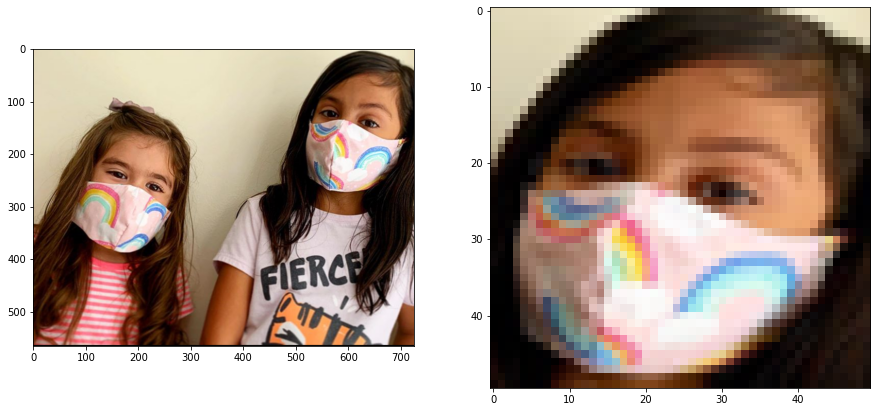

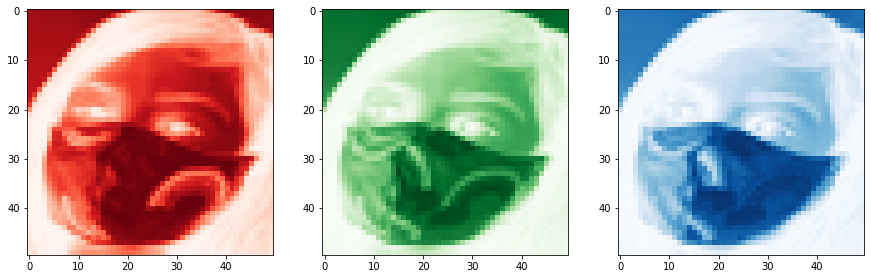

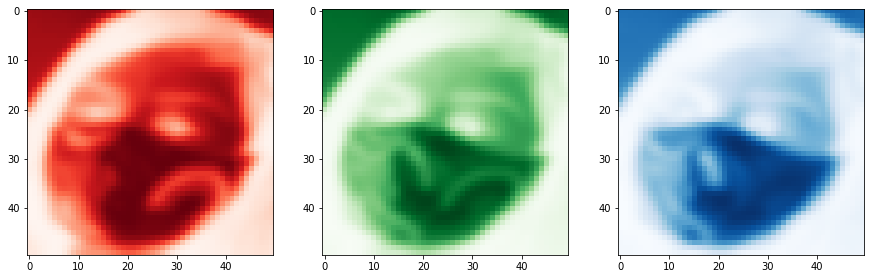

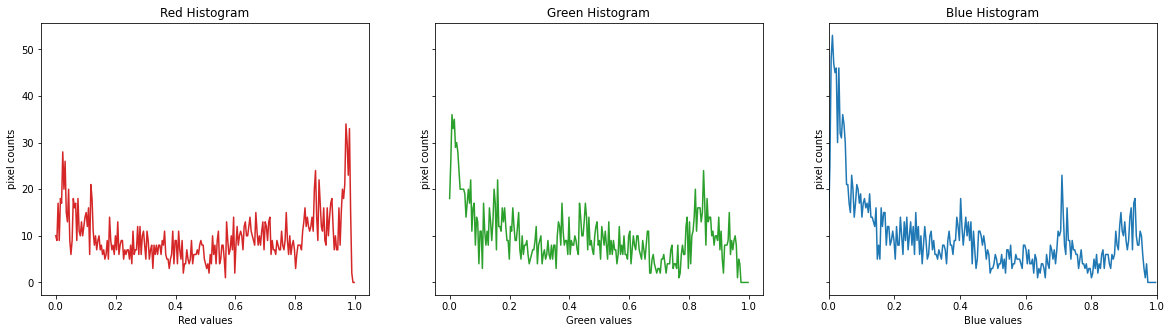

Max red_value: 1.0
Max green_value: 0.04296875
Max blue_value: 0.046875
(INDEX : 1


In [28]:
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt


i = 0
limit = 1

#pic_ref = "2756.png"

for pic_ref in dataset["name"]:
    print(pic_ref)
    
    df_loc_im = dataset[dataset["name"]==pic_ref]
    print(df_loc_im)
    
    for index, df_pic_row in df_loc_im.iterrows():
    
        search_tresh(
            rgb_hist(
                blurr_img(
                    split_rgb(
                        resize_img(
                            crop_img(df_pic_row)
                        )
                    )
                )
            )
        )
        print(f'(INDEX : {index}')
        i += 1
    if index == limit:
        break

In [29]:
def treshold ():

    red_treshold = max_red_pxcount
    green_treshold = max_green_pxcount
    blue_treshold = max_blue_pxcount

    binary_mask_r = blurred_image_r < red_treshold
    binary_mask_g = blurred_image_g < green_treshold
    binary_mask_b = blurred_image_b < blue_treshold

    fig, ((ax1, ax2),(ax3 ,ax4), (ax5 ,ax6)) = plt.subplots(3, 2,figsize=(15,15))
    ax1.imshow(blurred_image_r, cmap='Reds')
    ax2.imshow(binary_mask_r, cmap='Reds')

    ax3.imshow(blurred_image_g, cmap='Greens')
    ax4.imshow(binary_mask_g, cmap='Greens')

    ax5.imshow(blurred_image_b, cmap='Blues')
    ax6.imshow(binary_mask_b, cmap='Blues')



In [ ]:
binary_mask_g

In [ ]:
px_0_r = (binary_mask_r == False).sum()
px_1_r = (binary_mask_r == True).sum()
px_rate_r = px_1_r/px_0_r
print(f'px_rate_r: {px_rate_r}')

px_0_g = (binary_mask_g == False).sum()
px_1_g = (binary_mask_g == True).sum()
px_rate_g = px_1/px_0
print(f'px_rate_g: {px_rate_g}')

px_0_b = (binary_mask_b == False).sum()
px_1_b = (binary_mask_b == True).sum()
px_rate_b = px_1_b/px_0_b
print(f'px_rate_g: {px_rate_r}')

